# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

I am using the following libraries (others to be added at a later phase if necessary): 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing and checking Data Sets 

 Load the csv:  

In [299]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)


We use the method <code>head</code> to display the first 5 columns of the dataframe.

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.

In [8]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Quality Assessment

First of all, we will get rid of columns Unnamed and id which we don't need. We then use the describe method to check our data.

In [300]:
df.drop(['id','Unnamed: 0'], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Then, I check for the missing data in the dataset by using python isnull method and a helper dataframe and a for loop.

In [7]:
missing_data=df.isnull()
missing_data.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    21613
Name: Unnamed: 0, dtype: int64

id
False    21613
Name: id, dtype: int64

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat


We can see we have missing values for the columns bedrooms and bathrooms

In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10



We can replace the missing values of the column 'bedrooms' with the mean of the column  'bedrooms'. I am using this strategy because I don't want to delete samples from my dataset.

In [10]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

I do the same thing with column bathrooms.

In [11]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

No there are no empty values any more.

In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Another important step is to check the data types of the columns.

In [301]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

I change the datatype of date from object to datetime:

In [302]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%dT%H%M%S")

And we check to see of we have the correct data type and how it looks now:

In [303]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [304]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

# Data Exploration

Let's check the correlation between the columns related to our target value which is the price, using pandas method corr():

In [20]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Unnamed: 0       0.027372
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

We see that the strongest correlation related to price is the value of sqft_living. Let's plot this.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

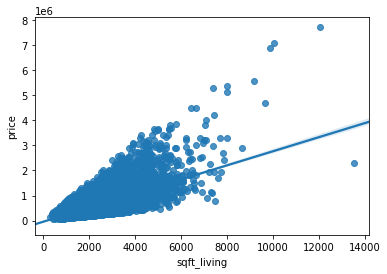

In [27]:
sns.regplot(x="sqft_living", y="price", data=df)

Check the correlation between sqft_above and price - we see it is positively correlated.

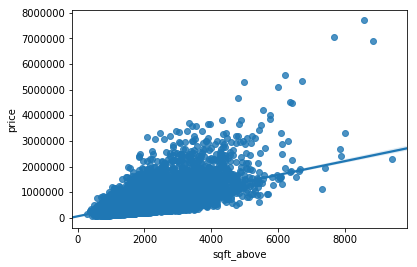

In [16]:
sns.regplot(x="sqft_above", y="price", data=df)

# Data Visualization

Let's see the grades distribution:

Text(0.5, 1.0, 'grades distribution')

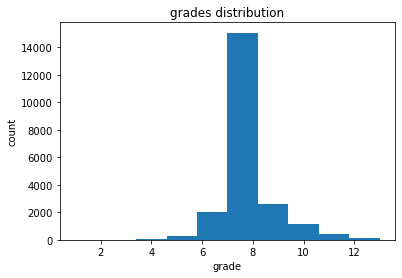

In [305]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["grade"])
plt.pyplot.xlabel("grade")
plt.pyplot.ylabel("count")
plt.pyplot.title("grades distribution")

We can see most of the houses have medium grade. <br>
Let me check the condition distribution.


Text(0.5, 1.0, 'condition distribution')

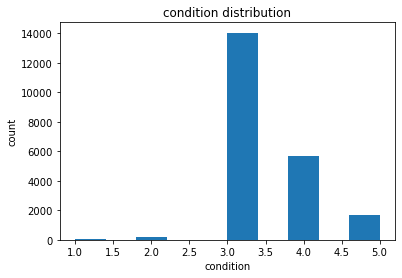

In [65]:
plt.pyplot.hist(df["condition"])
plt.pyplot.xlabel("condition")
plt.pyplot.ylabel("count")
plt.pyplot.title("condition distribution")

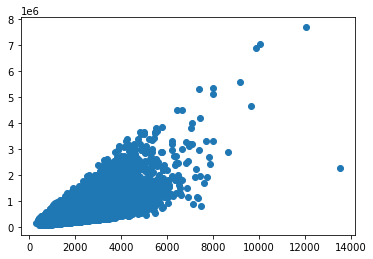

In [103]:
import matplotlib.pyplot as plt
plt.scatter(df.sqft_living, df.price)

# Feature Engineering

We use as features the values related to the size of the house, the condition and number of bathrooms. Let's see how they look like.

In [147]:
df[['sqft_living','sqft_basement', 'condition', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms','sqft_lot']].describe()

,sqft_living,sqft_basement,condition,sqft_above,sqft_living15,bathrooms,sqft_lot
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.153612,0.060479,3.409430,0.190052,0.319896,2.115736,0.009148
std,0.067832,0.091821,0.650743,0.088001,0.110369,0.768818,0.025083
min,0.021418,0.000000,1.000000,0.030818,0.064251,0.500000,0.000315
25%,0.105391,0.000000,3.000000,0.126461,0.239936,1.750000,0.003052
50%,0.141064,0.000000,3.000000,0.165781,0.296296,2.250000,0.004613
75%,0.188331,0.116183,4.000000,0.234857,0.380032,2.500000,0.006472
max,1.000000,1.000000,5.000000,1.000000,1.000000,8.000000,1.000000


We see that the values showing the surface have big values comparing to the others and will influence the result more due to its larger value. But this doesn't necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range. We use the below formula so thei values will range from 0 to 1.

In [113]:
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()

In [114]:
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()

In [127]:
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()

In [148]:
df[['sqft_living','sqft_basement', 'condition', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'sqft_lot']].describe()

,sqft_living,sqft_basement,condition,sqft_above,sqft_living15,bathrooms,sqft_lot
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.153612,0.060479,3.409430,0.190052,0.319896,2.115736,0.009148
std,0.067832,0.091821,0.650743,0.088001,0.110369,0.768818,0.025083
min,0.021418,0.000000,1.000000,0.030818,0.064251,0.500000,0.000315
25%,0.105391,0.000000,3.000000,0.126461,0.239936,1.750000,0.003052
50%,0.141064,0.000000,3.000000,0.165781,0.296296,2.250000,0.004613
75%,0.188331,0.116183,4.000000,0.234857,0.380032,2.500000,0.006472
max,1.000000,1.000000,5.000000,1.000000,1.000000,8.000000,1.000000


I notice that the grades have 13 unique values. We can use binning to transform the values into categorical "bins". 
We split the grade data into 3 bins and we will have 3 groups: 1 for low grade, 2 for medium grade and 3 for good grade. But first let's use a plot to see the distribution of values in grades.

In [117]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

Text(0.5, 1.0, 'grades distribution')

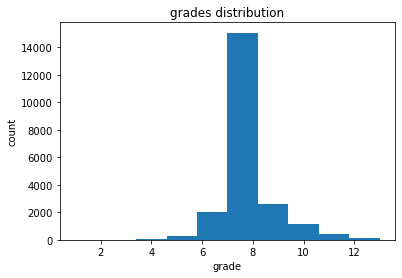

In [118]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["grade"])
# set x/y labels and plot title
plt.pyplot.xlabel("grade")
plt.pyplot.ylabel("count")
plt.pyplot.title("grades distribution")

Now let's split the data into bins and see the distribution now.

In [121]:
bins = np.linspace(min(df['grade']), max(df['grade']), 4)
group_names = [1,2,3]
df['grade'] = pd.cut(df['grade'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'grades distribution')

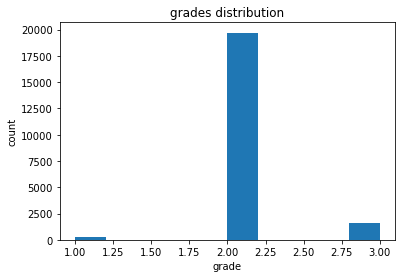

In [122]:
plt.pyplot.hist(df["grade"])
plt.pyplot.xlabel("grade")
plt.pyplot.ylabel("count")
plt.pyplot.title("grades distribution")

# Data Exploration

Let's use descriptical satistical analysis first to check the correlation between our selected features and the price target.

In [162]:
df[['price','sqft_living','sqft_basement', 'condition', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']].corr()

,price,sqft_living,sqft_basement,condition,sqft_above,sqft_living15,bathrooms
price,1.000000,0.702035,0.323816,0.036362,0.605567,0.585379,0.525738
sqft_living,0.702035,1.000000,0.435043,-0.058753,0.876597,0.756420,0.755371
sqft_basement,0.323816,0.435043,1.000000,0.174105,-0.051943,0.200355,0.283428
condition,0.036362,-0.058753,0.174105,1.000000,-0.158214,-0.092824,-0.126197
sqft_above,0.605567,0.876597,-0.051943,-0.158214,1.000000,0.731870,0.686309
sqft_living15,0.585379,0.756420,0.200355,-0.092824,0.731870,1.000000,0.569467
bathrooms,0.525738,0.755371,0.283428,-0.126197,0.686309,0.569467,1.000000


I see that the condition is actually not influencing the price, therefore, I'll remove it from the selected features.

## Analyze feature patterns using Visualization

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

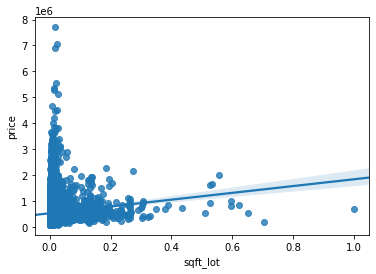

In [161]:
sns.regplot(x="sqft_lot", y="price", data=df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

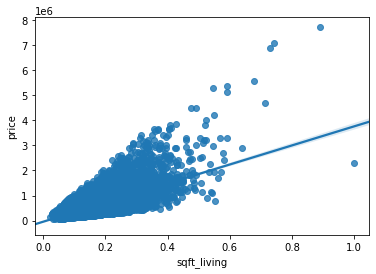

In [141]:
sns.regplot(x="sqft_living", y="price", data=df)

As the square footage of the home goes up, the price goes up: this indicates a positive direct correlation between these two
variables.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

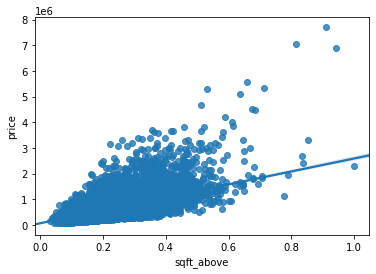

In [143]:
sns.regplot(x="sqft_above", y="price", data=df)

The same correlation can be seen between square footage of house and price.

<AxesSubplot:xlabel='condition', ylabel='price'>

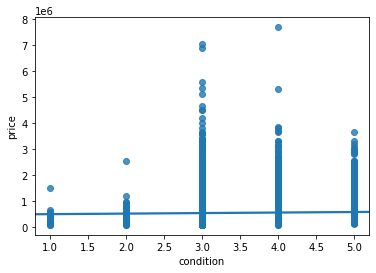

In [149]:
sns.regplot(x="condition", y="price", data=df)

We see that the condition of the house is not correlated with its price.

Let's also try a column not selected in our features, the lotsize area in 2015.

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

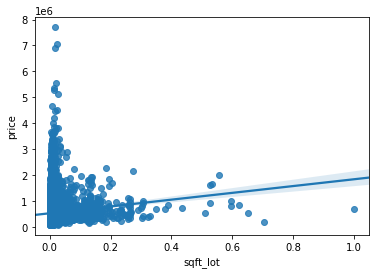

In [163]:
sns.regplot(x="sqft_lot", y="price", data=df)

Again, we notice no correlation.

For the categorical variables like grade in my dataset, a boxplot is a good way to visualize.

<AxesSubplot:xlabel='grade', ylabel='price'>

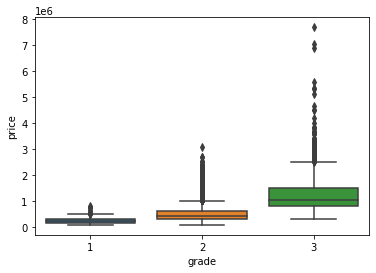

In [152]:
sns.boxplot(x="grade", y="price", data=df)

Considering the distributions of price between the different grades don't overlap, the grade is a good predictor.

In conclusion, I include in my features list the following numerical variables:
- Square footage of the home
- Living room area in 2015
- Square footage of the basement
- number of bathrooms

And the following categorial variable:
- grade

# Model Development using Linear Regression

I have a list of features which I want to use to predict one continuous target. Therefore, a multiple linear regression is chosen for my model. 

In [164]:
from sklearn.linear_model import LinearRegression

In [166]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
X=df[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']]
Y=df['price']

In [172]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
Yhat=lm.predict(X)
Yhat[0:5]

array([301062.99123683, 603780.52696187, 303589.17977965, 499018.71544533,
       420142.57970592])

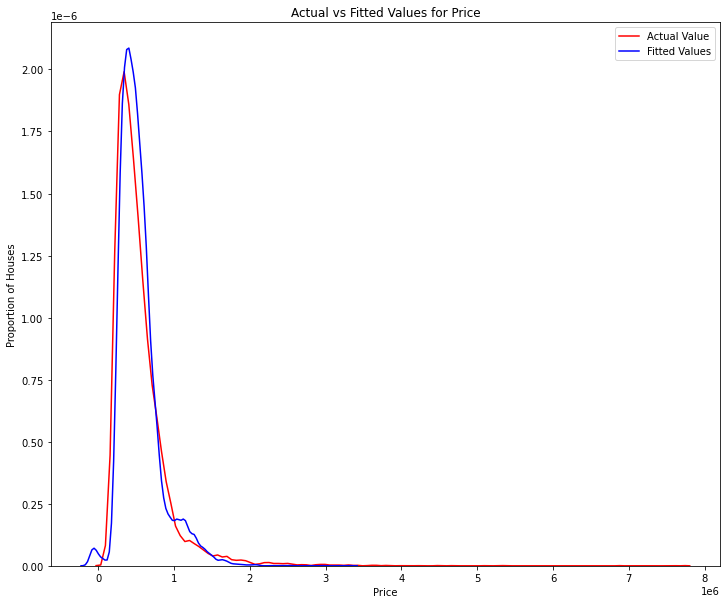

In [176]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Houses')
plt.show()
plt.close()

The fitted values are close to the actual values, as the distributions overlap, but it is room for improvement.

# Model Evaluation

## Training and testing

In [241]:
y_data = df['price']

In [240]:
x_data = df[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']]

The data is randomly split into training and testing set; the testing set is 20% of the total dataset.

In [242]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4323
number of training samples: 17290


In [243]:
lm.fit(x_train[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:
lm.score(x_test[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']], y_test)

0.538286735761777

In [245]:
yhat_train = lr.predict(x_train[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']])

In [246]:
yhat_train[0:5]

array([582296.49775758, 534203.96584497, 331732.53644926, 667597.72443364,
       330368.87819377])

In [247]:
yhat_test = lr.predict(x_test[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']])
yhat_test[0:5]

array([687753.35415817, 420161.65497352, 939275.66954169, 567286.58267586,
       372100.86935467])

Model evaluation using training and testing data separately.

In [249]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

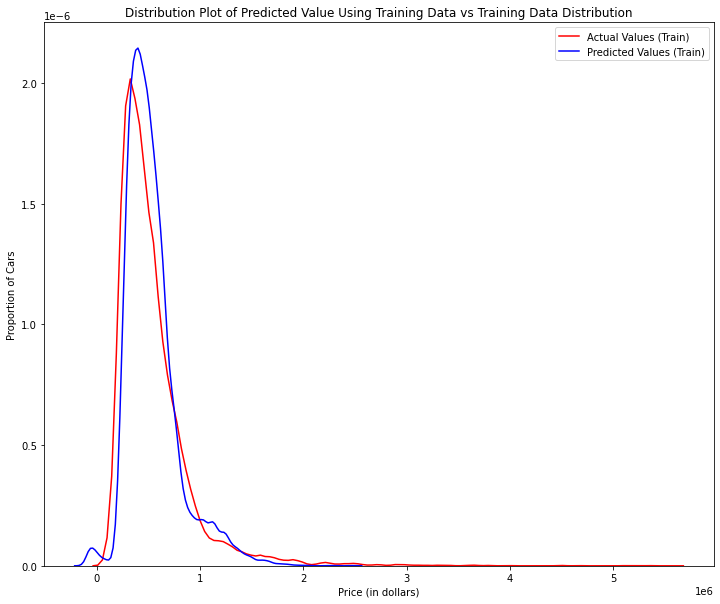

In [251]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)",Title)

So far the model seems to be doing well in learning from the training dataset. But what happens when the model
encounters new data from the testing dataset? When the model generates new values from the test data, we see
the distribution of the predicted values is not that different from the actual target values

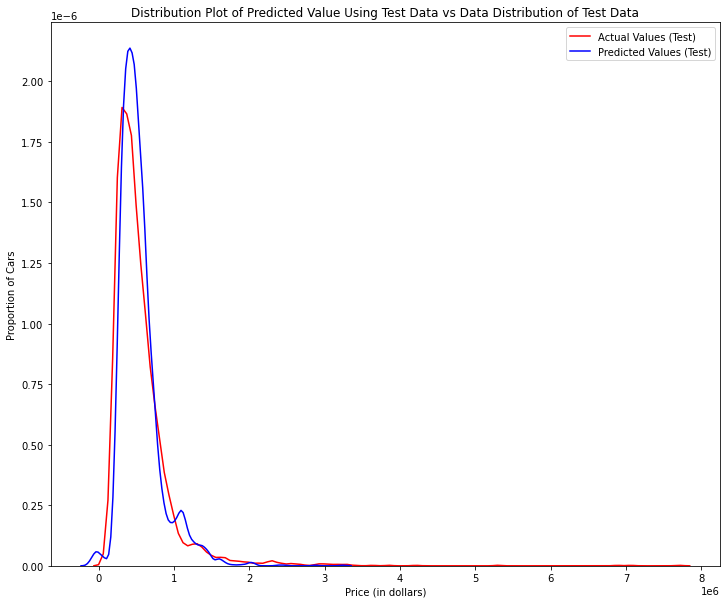

In [252]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

 Let's see if polynomial regression also exhibits a drop in the
prediction accuracy when analysing the test dataset.

In [253]:
from sklearn.preprocessing import PolynomialFeatures

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [265]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']])
x_test_pr=pr.fit_transform(x_test[['sqft_living', 'bathrooms', 'sqft_living15', 'sqft_basement','grade']])
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [266]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [267]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 375819.13807555, 1321746.46905892,  377801.62884831,
        319042.3881581 ,  811091.88990023])

In [268]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 375819.13807555 1321746.46905892  377801.62884831  319042.3881581 ]
True values: [ 297000. 1578000.  562100.  631500.]


In [269]:
poly.score(x_train_pr, y_train)

0.5105722785057791

In [270]:
poly.score(x_test_pr, y_test)

0.5522904142243616

In the next step I am using a Ridge Regression.

In [274]:
from sklearn.linear_model import Ridge

In [288]:
RigeModel=Ridge(alpha=10)

In [289]:
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5870293679658357

In [277]:
yhat = RigeModel.predict(x_test_pr)
yhat[0:5]

array([ 366524.86298744, 1359240.20844849,  396563.05050683,
        360207.40156176,  669421.99095388])

In [278]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 366524.86298744 1359240.20844849  396563.05050683  360207.40156176]
test set : [ 297000. 1578000.  562100.  631500.]


In [279]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

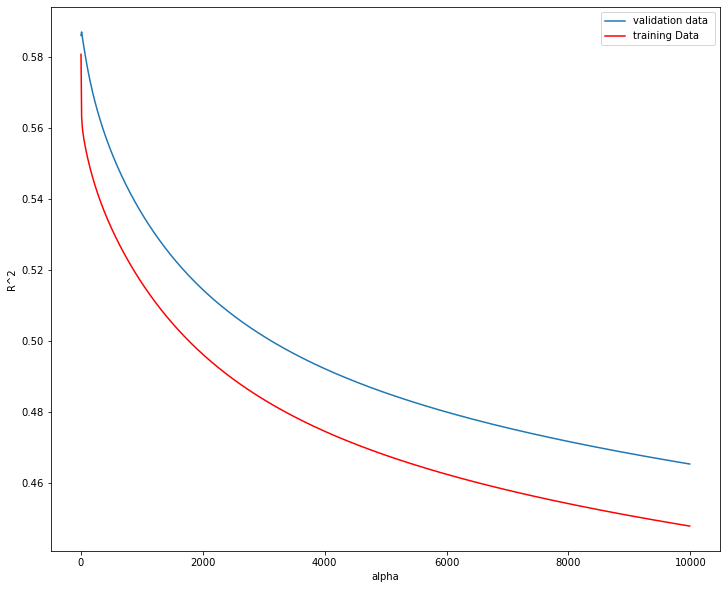

In [280]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.plot(ALFA,Rsqu_test, label='validation data ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training
data. The x-axis represents the different values of Alfa
The red line in figure 6 represents the R^2 of the test data, as Alpha increases the R^2 decreases; therefore as
Alfa increases the model performs worse on the test data. The blue line represents the R^2 on the validation
data, as the value for Alfa increases the R^2 decreases.

In [287]:
RigeModel2=Ridge(alpha=0.1)
RigeModel2.fit(x_train_pr, y_train)
RigeModel2.score(x_test_pr, y_test)

0.5875746309033313